In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('hw_bootstrap.csv', sep = ';', usecols = ['value','experimentVariant'])

In [4]:
df

,value,experimentVariant
0,"10,3804953740268",Control
1,"9,54686666784264",Control
2,"11,0882146509904",Control
3,"10,1472740570122",Control
4,"9,78980767524929",Control
...,...,...
995,1000,Treatment
996,1200,Treatment
997,1500,Treatment
998,2000,Treatment


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   value              1000 non-null   object
 1   experimentVariant  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [6]:
data_column_1 = df.loc[df.experimentVariant == 'Control'].value

In [7]:
data_column_2 = df.query("experimentVariant == 'Treatment'").value

In [11]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    s1=[]
    s2=[]
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2))
        s1.append(statistic(samples_1))
        s2.append(statistic(samples_2))# mean() - применяем статистику
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value,
            "s1": s1,
            "s2" : s2
            }

In [12]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

n = 10000
lift = 1.01

x = np.random.exponential(size=n)
y = np.random.exponential(size=n) * lift

df1 = pd.DataFrame({"x": x, "y": y})

  0%|          | 0/2000 [00:00<?, ?it/s]

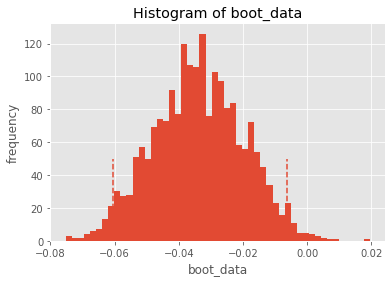

In [13]:
booted_data = get_bootstrap(df1.x, df1.y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [267]:
booted_data["p_value"]

0.015967841910844854

In [268]:
booted_data["ci"]

,0
0.025,-0.060541
0.975,-0.006225


In [16]:
s1 = booted_data["s1"]

In [17]:
s2 = booted_data["s2"]

In [18]:
mannwhitneyu(s1, s2)

MannwhitneyuResult(statistic=30409.0, pvalue=0.0)

In [27]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    s1=[]
    s2=[]
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2))
        s1.append(statistic(samples_1))
        s2.append(statistic(samples_2))# median() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value,
           "s1": s1,
            "s2" : s2}

In [28]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

n = 10000
lift = 1.01

x = np.random.exponential(size=n)
y = np.random.exponential(size=n) * lift

df2 = pd.DataFrame({"x": x, "y": y})

  0%|          | 0/2000 [00:00<?, ?it/s]

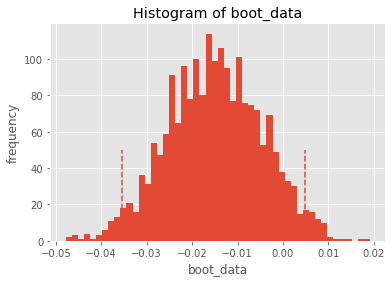

In [29]:
booted_data = get_bootstrap(df2.x, df2.y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [30]:
booted_data["p_value"]

0.14768803575739364

In [31]:
booted_data["ci"]

,0
0.025,-0.035361
0.975,0.004872


In [32]:
s1 = booted_data["s1"]

In [33]:
s2 = booted_data["s2"]

In [34]:
mannwhitneyu(s1, s2)

MannwhitneyuResult(statistic=630227.0, pvalue=6.793716001098249e-308)

1. Выводы по бутстрэпам: распределения средних значений выборок значимо различаются, а медианных - нет. 
2. Вот насчет критерия Манна-Уитни не очень уверен. Я решил, что необходимо достать семплы с примененным к ним методам (samples_1 и samples_2), и их между собой U критерием сравнить, поэтому я внутри функции добавил еще 2 списка по примеру boot_data. Результаты это дало, в адекватности их не уверен. Согласно им, распределения и средних значений выборок и медианных значимо различаются. 